Линейная регрессия 

Линейная регрессия (Linear regression) — модель зависимости переменной x от одной или нескольких других переменных
(факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных
и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей. 

Применение линейной регрессии 

Предположим, нам задан набор из 7 точек (таблица ниже).

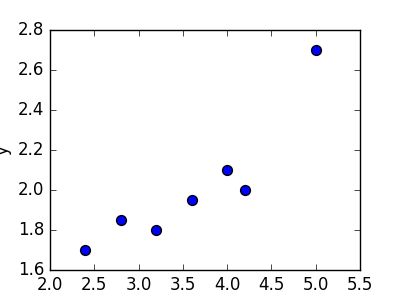

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. 

Рассмотрим пример работы с линейной регрессией.

Шаг 1: Импортируем пакеты и классы

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

Шаг 2 : Предоставляем данные

Вторым шагом определите данные, с которыми предстоит работать. Входы (регрессоры, x) и выход (предиктор, y) должны быть массивами (экземпляры класса numpy.ndarray) или похожими объектами. Вот простейший способ предоставления данных регрессии:

In [3]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

Теперь у вас два массива: вход x и выход y. Вам нужно вызвать .reshape()на x, потому что этот массив должен быть двумерным или более точным – иметь одну колонку и необходимое количество рядов. Это как раз то, что определяет аргумент (-1, 1).

Вот как x и y выглядят теперь:

In [4]:
print(x)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


In [5]:
print(y)

[ 5 20 14 32 22 38]


Шаг 3: Создаём модель

In [6]:
model = LinearRegression()

Эта операция создаёт переменную model в качестве экземпляра LinearRegression.

Пришло время задействовать model. Сначала вызовите .fit() на model:

In [7]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

С помощью .fit() вычисляются оптимальные значение весов b₀ и b₁, используя существующие вход и выход (x и y) в качестве аргументов. Другими словами, .fit() совмещает модель. Она возвращает self - переменную model. Поэтому можно заменить две последние операции на:

In [8]:
model = LinearRegression().fit(x, y)

Шаг 4: Получаем результаты

После совмещения модели нужно убедиться в удовлетворительности результатов для интерпретации.

Получим определения (R²) с помощью .score(), вызванной на model:

In [10]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.7158756137479542


In [11]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)


intercept: 5.633333333333329
slope: [0.54]


Код выше показывает, как получить b₀ и b₁. Заметьте, что .intercept_ – это скаляр, в то время как .coef_ – массив.

Примерное значение b₀ = 5.63 показывает, что наша модель предсказывает ответ 5.63 при x, равном нулю. Равенство b₁ = 0.54 означает, что предсказанный ответ возрастает до 0.54 при x, увеличенным на единицу.

Шаг 5: Предскажем ответ

Когда вас устроит ваша модель, вы можете использовать её для прогнозов с текущими или другими данными.

Получите предсказанный ответ, используя .predict():

In [12]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


Применяя .predict(), вы передаёте регрессор в качестве аргумента и получаете соответствующий предсказанный ответ.

На практике модель регрессии часто используется для прогнозов. Это значит, что мы можем использовать приспособленные модели для вычисления выходов на базе других, новых входов:

In [15]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [16]:
y_new = model.predict(x_new)
print(y_new)

[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


Здесь .predict() применяется на новом регрессоре x_new и приводит к ответу y_new. Этот пример удобно использует arange() из NumPy для генерации массива с элементами от 0 (включительно) до 5 (исключительно) – 0, 1, 2, 3, и 4.

Теперь у нас есть своя модель линейной регрессии)

А теперь небольшой пример использования линейной регрессии в жизни.

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer 
%matplotlib inline

np.random.seed(42)

boston_data = load_boston() 
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names) 
target = boston_data.target

Вот краткое описание нашего датасета:

CRIM — уровень преступности на душу населения по городам.
ZN — доля земли под жилую застройку, разделенная на участки площадью более 25 000 кв. футов.
INDUS — доля акров, которые принадлежат предприятиям, не связанным с розничной торговлей, на город.
CHAS — фиктивная переменная реки Чарльз (1, если участок соединен с рекой; 0 в противном случае).
NOX — концентрация оксидов азота (в десятимиллионных долях).
RM — среднее количество комнат в доме.
AGE — доля занимаемых зданий, построенных до 1940 г.
DIS — взвешенные расстояния до пяти бостонских центров занятости.
RAD — индекс доступности радиальных автомобильных дорог.
TAX — полная ставка налога на имущество за каждые 10000 долларов стоимости.
PTRATIO — соотношение учеников и учителей по городам.
B — 1000 (Bk — 0,63) , где Bk — доля граждан афроамериканского происхождения по городам.
LSTAT — процент более низкого статуса населения.
TARGET —медианное значение стоимости занимаемых домов в тысячах долларов США.

Задача данной выборки сводится к прогнозированию целевого показателя (медианной стоимости недвижимости), используя приведенные выше показатели (все, кроме TARGET).

Как мы можем подойти к этй проблеме?
Для нашего первого прохода давайте упростим задачу. Допустим, мы просто хотим использовать признак LSAT для прогнозирования TARGET.

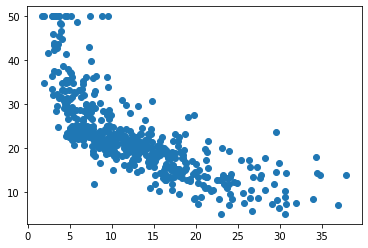

In [18]:
plt.scatter(boston_df['LSTAT'], target);

По оси X у нас есть LSTAT, а по оси Y — TARGET. Просто взглянув на это, можно увидеть отрицательную взаимосвязь: когда LSTAT растет, TARGET падает.

Как мы можем решить проблему предсказания TARGET на основе LSTAT? Хорошая отправная точка для размышлений: допустим, мы разрабатываем множество моделей для прогнозирования целевого показателя, как нам выбрать лучшую из них? Как только мы найдем подходящее для сравнения значение, наша задача — минимизировать/максимизировать его.

Поэтому для нашей задачи предлагаю использовать среднюю квадратическую ошибку (mean squared error) в качестве оценочной метрики.

Теперь, когда у нас есть модель и функция оценки, наша задача состоит в том, чтобы найти бета-значения, которые минимизируют MSE для наших данных. Для линейной регрессии на самом деле существует решение в замкнутой форме, называемое нормальным уравнением. Однако в этом посте мы собираемся использовать другую технику — градиентный спуск.

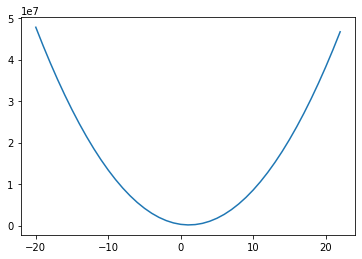

In [19]:
mses = []
lstat_coef = range(-20, 23)

for coef in lstat_coef:
    pred_values = np.array([coef * lstat for lstat in boston_df.LSTAT.values])
    mses.append(np.sum((target - pred_values)**2))
    
plt.plot(lstat_coef, mses);

Для построения графика выше мы взяли диапазон значений коэффициентов для LSTAT, и для каждого из них рассчитали MSE на основе наших данных. Если мы затем отобразим полученные значения, мы получим приведенную выше кривую — выглядит довольно выпуклой! И оказывается, что наша функция MSE с нашей моделью линейной регрессии всегда будет выпуклой! Это означает: мы можем использовать градиентный спуск, чтобы найти оптимальные коэффициенты для нашей модели!

Теперь давайте запустим наш алгоритм градиентного спуска и убедимся, что MSE действительно уменьшается:

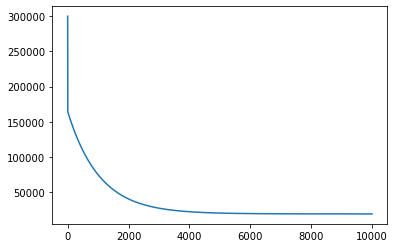

In [20]:
beta_0 = 0
beta_1 = 0
learning_rate = 0.001
lstat_values = boston_df.LSTAT.values
n = len(lstat_values)
all_mse = []

for _ in range(10000):
    predicted = beta_0 + beta_1 * lstat_values
    residuals = target - predicted
    all_mse.append(np.sum(residuals**2))
    beta_0 = beta_0 - learning_rate * ((2/n) * np.sum(residuals) * -1)
    beta_1 = beta_1 - learning_rate * ((2/n) * residuals.dot(lstat_values) * -1)
    
plt.plot(range(len(all_mse)), all_mse);

Beta 0: 34.27230357706076
Beta 1: -0.9331466362919295


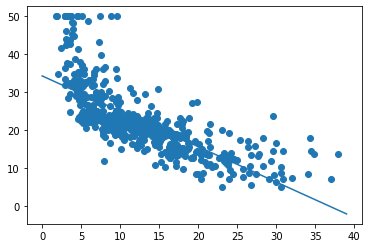

In [21]:
print(f"Beta 0: {beta_0}")
print(f"Beta 1: {beta_1}")
plt.scatter(boston_df['LSTAT'], target)
x = range(0, 40)
plt.plot(x, [beta_0 + beta_1 * l for l in x]);

Итак, запуск градиентного спуска показал, что оптимальное смещение составляет 34.55, а оптимальный наклон равен -0,95. На приведенном выше графике эта линия показана поверх наших данных, она выглядит как аппроксимирующая прямая.